## Isaac Rodriguez-Jimenez
## Dataset Analysis for Solano County Office of Education

## *****Exam Performance Dataset*****
### Dataset info:
http://roycekimmons.com/tools/generated_data/exams
### This dataset looks at the students performance on math, reading, and writing exams. 
### It also takes into account their demographics and other socioeconomic factors.

In order to make this analysis shorter, I will be focusing on the math exam.

In [198]:
import pandas as pd
import plotly.express as px

data = pd.read_csv('/Users/isaacrodriguez-jimenez/Downloads/exams.csv')

print('There are '+str(data.shape[0])+' entries in this dataset')
data.sample(10)  # sample function returns specified number of randomly selected rows


There are 1000 entries in this dataset


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
639,female,group B,associate's degree,standard,none,68,70,76
760,female,group C,some college,free/reduced,completed,64,81,87
586,female,group D,high school,free/reduced,none,15,39,40
965,male,group C,master's degree,free/reduced,none,45,53,45
310,male,group D,high school,standard,completed,88,77,78
831,male,group D,some college,free/reduced,completed,67,78,70
659,female,group A,high school,standard,none,79,86,84
765,male,group D,some college,standard,none,81,86,78
531,female,group D,high school,free/reduced,completed,67,75,84
384,male,group C,high school,standard,completed,64,66,69


#### Now we check for errors, duplicates and nulls in the dataset.

In [2]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
data.isnull().sum() # no null values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
data.duplicated().sum()  # no duplicate entries

0

##### Check for consistency and mispellings 

In [5]:
data_categorical = data.select_dtypes('object')    # extract categorical data
for categorical in data_categorical.columns:
    print(data_categorical[categorical].value_counts())
    
# The purpose of this test is to check for consistent use of textual data.
# ex. there could be a gender male and a gender Male.

gender
male      508
female    492
Name: count, dtype: int64
race/ethnicity
group C    323
group D    257
group B    198
group E    143
group A     79
Name: count, dtype: int64
parental level of education
some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: count, dtype: int64
lunch
standard        660
free/reduced    340
Name: count, dtype: int64
test preparation course
none         656
completed    344
Name: count, dtype: int64


##### Overall this dataset seems clean and ready to use

## EDA Exploratory Data Analysis

#### Exam Data

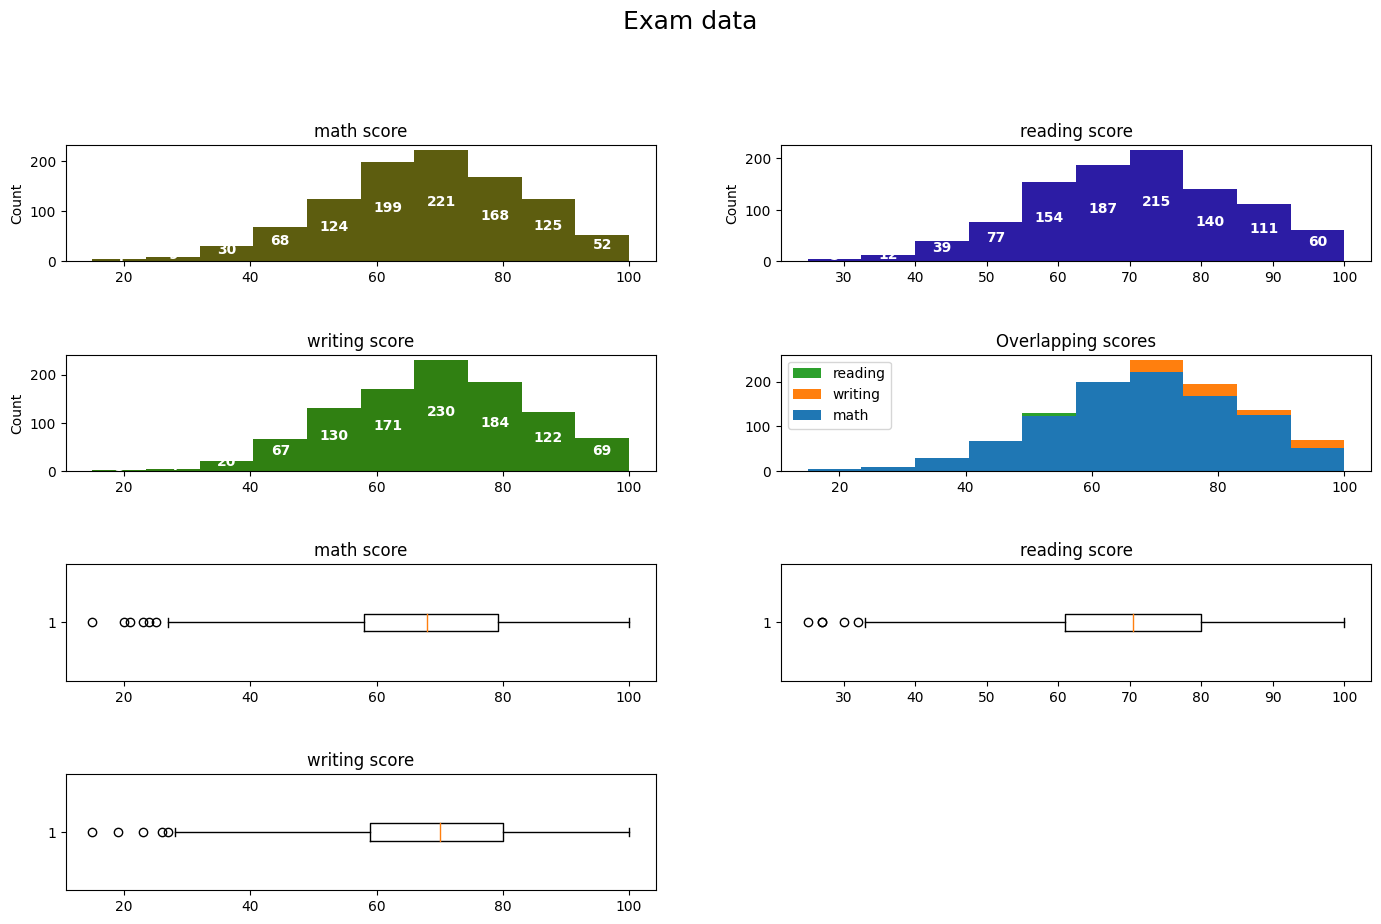

In [7]:
import matplotlib.pyplot as plt
import numpy as np

data_exam = data.select_dtypes('int64') 
plt.figure(figsize=(15, 10))
plt.suptitle("Exam data", fontsize=18, y=0.95)

n = 0
for e_data in data_exam.columns:
    ax = plt.subplot(4, 2, n + 1)
    data_exam[e_data].plot(ax = ax,kind='hist',color = np.random.rand(3,))
    plt.tight_layout(pad=5)
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2 + bar.get_y(),
        round(bar.get_height()), ha = 'center',
         color = 'w', weight = 'bold', size = 10)

    ax.set_title(e_data)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
  
    n = n+1

ax = plt.subplot(4, 2, n + 1)
plt.hist(data_exam, histtype='stepfilled', label=['math', 'writing', 'reading'])
ax.set_title('Overlapping scores')
ax.legend()

n = n+1

for e_data in data_exam.columns:
    ax = plt.subplot(4, 2, n + 1)
    plt.boxplot(data_exam[e_data], vert = False)
    ax.set_title(e_data)
   
    
    n = n+1


##### My thoughts
In this dataset we can visually see how the students performed in each subject. Out of 1000 students the data shows that about 50% of them placed in between 60 to 80 percent. It is important to find out if the data can tell us why the 80 to 100 percent is much lower. From these graphs we can see that approximately less than 250 students received a grade greater than 80%. Another thing that concerns me is the extremely low grades. I wonder if these are the same students that are not performing well in all 3 exams. 

### Categorical Data

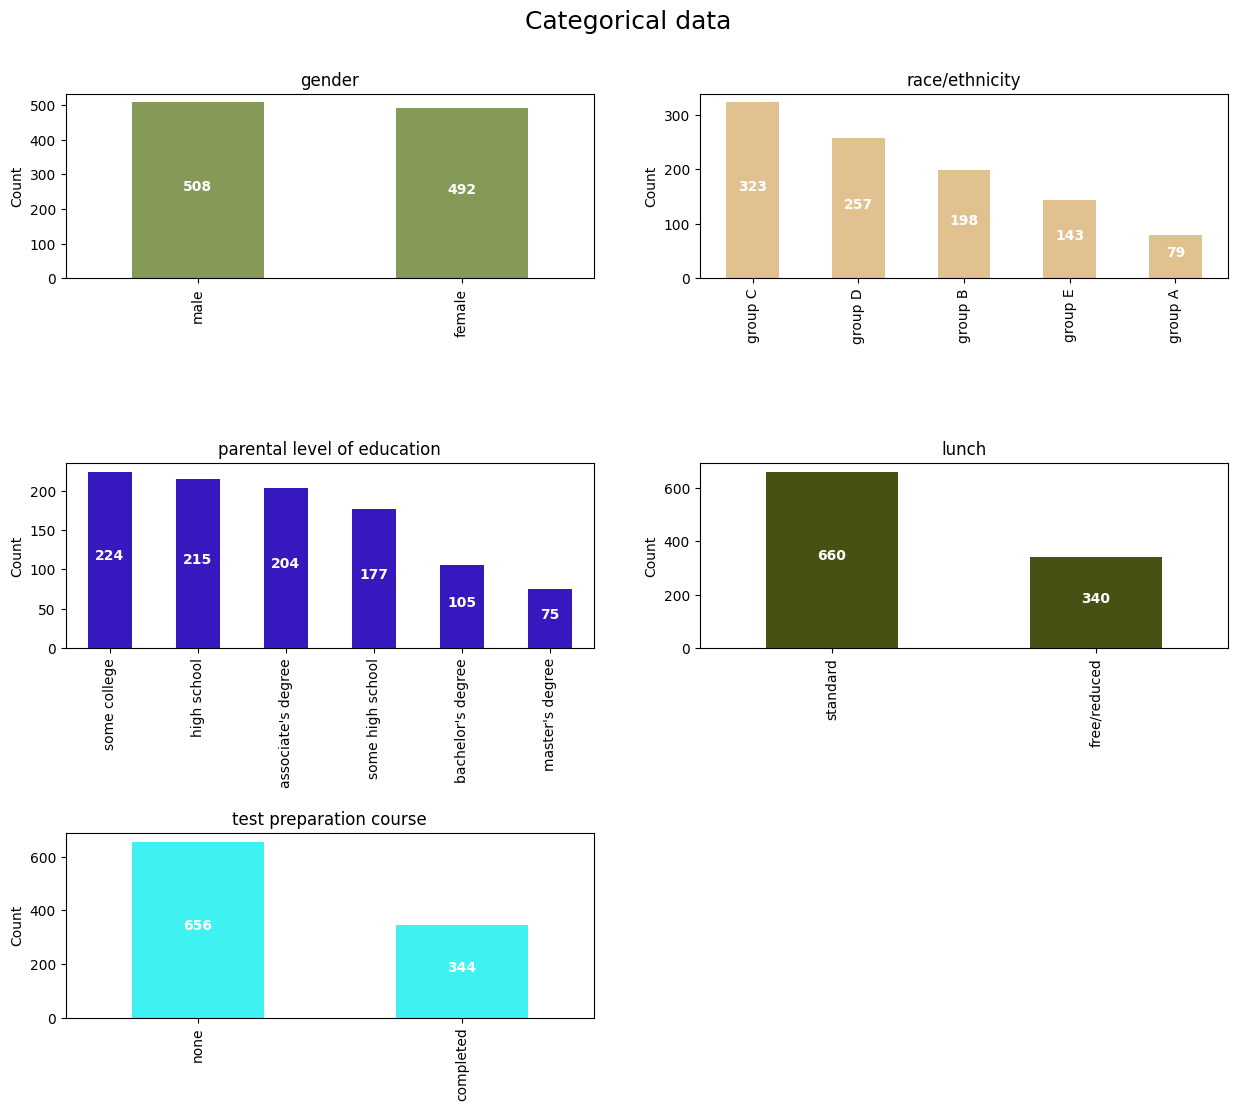

In [199]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=1)
plt.suptitle("Categorical data", fontsize=18, y=0.95)
n = 0

for categorical in data_categorical.columns:
    ax = plt.subplot(3, 2, n + 1)
    
    data_categorical[categorical].value_counts().plot(ax = ax,kind='bar',color = np.random.rand(3,))

    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2 + bar.get_y(),
        round(bar.get_height()), ha = 'center',
         color = 'w', weight = 'bold', size = 10)

    ax.set_title(categorical)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    
    n = n+1

#### My thoughts
Gender: 
    This column of the dataset is almost perfectly balanced with 508 male students and 492 female students. This is important because it will allow us to analyze academic performance between gender in an unbalanced way.

Race/Ethnicity: 
    This column represents the 5 racial/ethnic groups that attend the school. The minority is group A with 79 out of 1000 students. The next under represented group is group E with 143 students. Next comes group B with 198 students. Second to last is group D with 257 and finally group C with 323 students. These are important findings because it gives us the ability to explore how different ethnicitys perform on their exams and how changing socioeconomic factors may impact these students.

Parental level of Education: 
    This feature represents the level of education the student's parents have achieved. An important consideration is to check if student whoes parents have higher education performed better on their exams.

Lunch: 
    This columns describes how many students are below the income threshold to receive free or reduced lunch. According to the data 340 students out of 1000 received free or reduced lunch while 660 student pay the standard fee. This insight may allow us to discover if lower income students have notable impact on academic perfomance.

Test Preparation Course:
     Approximatly one third of the students in this sample took the test preparation course. That is 344 students completed this course while 656 did not. Using this data it is important to see if this course was worth the students time and effort. Further analysis will determine if this course needs to stay, improve, or be removed.

### Gender, Race/Ethnicity and Lunch 

##### Math

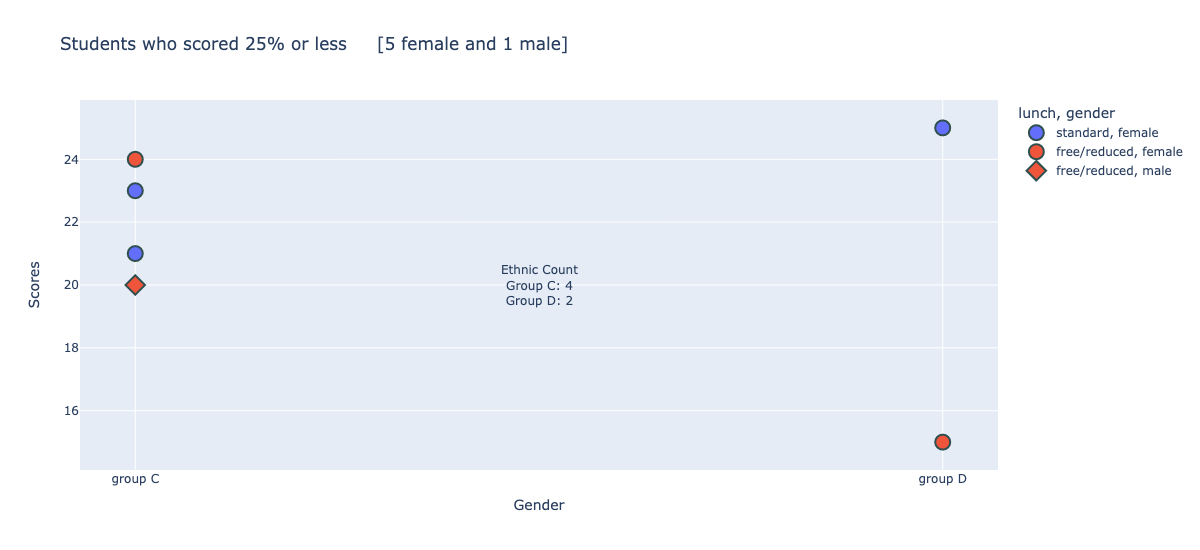

In [131]:
Q1_math_data = data[data['math score'] <= 25]
f_count = Q1_math_data['gender'].value_counts()[0]
m_count = Q1_math_data['gender'].value_counts()[1]

fig = px.scatter(data_frame = Q1_math_data, x ='race/ethnicity',y = 'math score',color = 'lunch',symbol = 'gender',
                 title='Students who scored 25% or less     ['+str(f_count)+' female and '+str(m_count)+' male]')

fig.update_layout(xaxis_title="Gender", yaxis_title="Scores", autosize=False, width=1200,
                 height=550)

fig.update_traces(marker=dict(size=15,line=dict(width=2,color='DarkSlateGrey')),
                 selector=dict(mode='markers'))
fig.add_annotation(x=0.5, y=20,
            text='Ethnic Count<br>Group C: 4<br>Group D: 2',
            showarrow=False,
            yshift=0)
fig.show("png")

The lowest performing students belong to group C and D who are primarily female. Since there are only a few students who scored this low, it is hard to say if the data will reveal any further insight. These students may need further instruction outside of school.

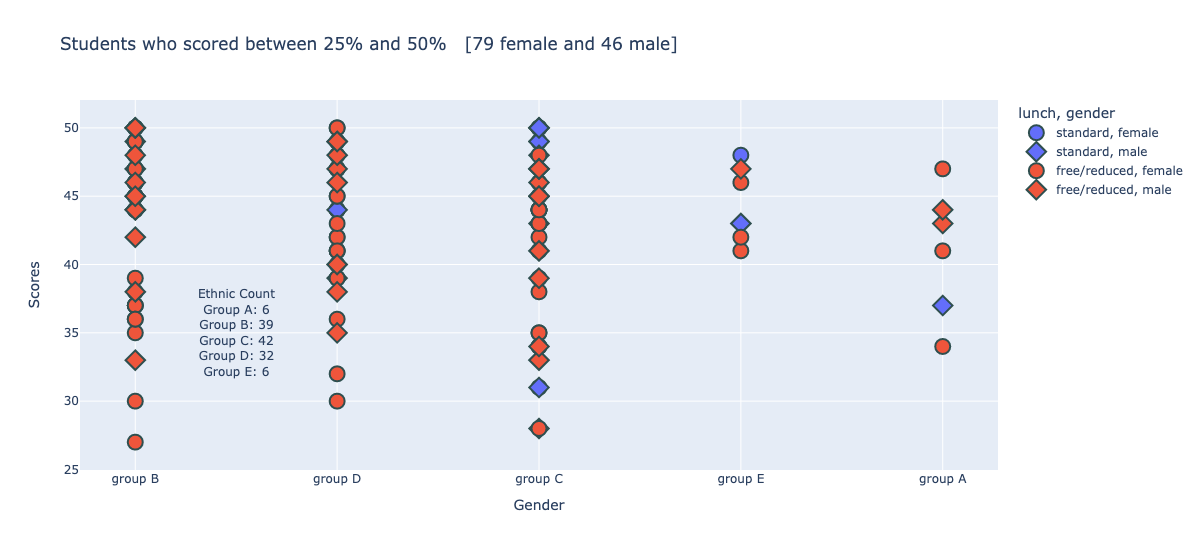

In [130]:
Q2_math_data = data[(data['math score'] <= 50) & (data['math score'] > 25)]
f_count = Q2_math_data['gender'].value_counts()[0]
m_count = Q2_math_data['gender'].value_counts()[1]


fig = px.scatter(data_frame = Q2_math_data, x ='race/ethnicity',y = 'math score',color = 'lunch',symbol = 'gender',
                 title='Students who scored between 25% and 50%   ['+str(f_count)+' female and '+str(m_count)+' male]')
fig.update_layout(xaxis_title="Gender",
                 yaxis_title="Scores",
                 autosize=False,
                 width=1200,
                 height=550)
fig.update_traces(marker=dict(size=15,line=dict(width=2,color='DarkSlateGrey')),
                 selector=dict(mode='markers'))
fig.add_annotation(x=0.5, y=35,
            text='Ethnic Count<br>Group A: 6<br>Group B: 39<br>Group C: 42<br>Group D: 32<br>Group E: 6',
            showarrow=False,
            yshift=0)
fig.show("png")

Group B, C, and D mostly occupy the 25% to 50% scores. Most of these students are considered to have lower income beacause they have free or reduced lunch. 

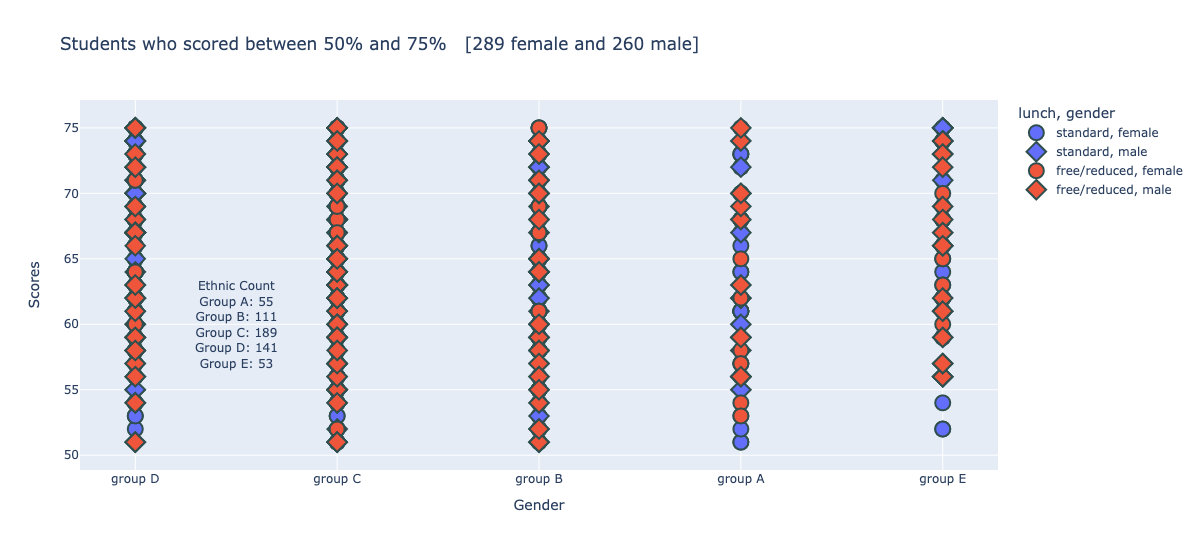

In [132]:
Q3_math_data = data[(data['math score'] <= 75) & (data['math score'] > 50)]
f_count = Q3_math_data['gender'].value_counts()[0]
m_count = Q3_math_data['gender'].value_counts()[1]


fig = px.scatter(data_frame = Q3_math_data, x ='race/ethnicity',y = 'math score',color = 'lunch',symbol = 'gender',
                 title='Students who scored between 50% and 75%   ['+str(f_count)+' female and '+str(m_count)+' male]')
fig.update_layout(xaxis_title="Gender",
                 yaxis_title="Scores",
                 autosize=False,
                 width=1200,
                 height=550)
fig.update_traces(marker=dict(size=15,line=dict(width=2,color='DarkSlateGrey')),
                 selector=dict(mode='markers'))
fig.add_annotation(x=0.5, y=60,
            text='Ethnic Count<br>Group A: 55<br>Group B: 111<br>Group C: 189<br>Group D: 141<br>Group E: 53',
            showarrow=False,
            yshift=0)
fig.show("png")

Similarly group B, C, and D are still the major groups in this section. Group A and E have around 50 students each in this section. Most students have free or reduced lunch.

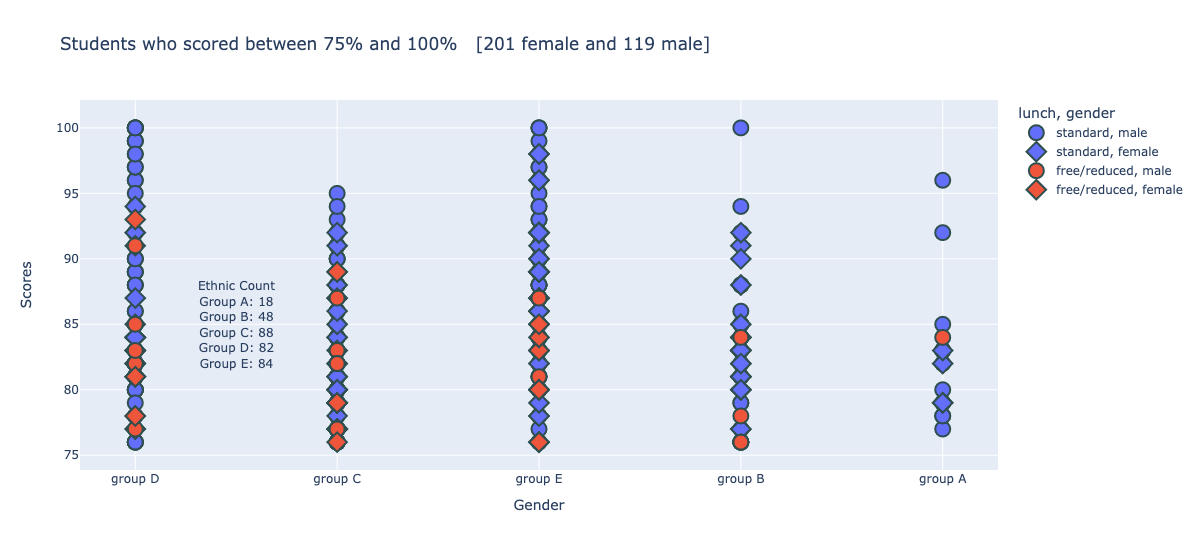

In [133]:
Q4_math_data = data[(data['math score'] <= 100) & (data['math score'] > 75)]
f_count = Q4_math_data['gender'].value_counts()[0]
m_count = Q4_math_data['gender'].value_counts()[1]


fig = px.scatter(data_frame = Q4_math_data, x ='race/ethnicity',y = 'math score',color = 'lunch',symbol = 'gender',
                 title='Students who scored between 75% and 100%   ['+str(f_count)+' female and '+str(m_count)+' male]')
fig.update_layout(xaxis_title="Gender",
                 yaxis_title="Scores",
                 autosize=False,
                 width=1200,
                 height=550)
fig.update_traces(marker=dict(size=15,line=dict(width=2,color='DarkSlateGrey')),
                 selector=dict(mode='markers'))
fig.add_annotation(x=0.5, y=85,
            text='Ethnic Count<br>Group A: 18<br>Group B: 48<br>Group C: 88<br>Group D: 82<br>Group E: 84',
            showarrow=False,
            yshift=0)
fig.show("png")

Regardless of group, more female students performed better than the male students. Overall most students in this score range do not have reduced or free lunch. It is possible that parents invest finacially in thier childrens education.

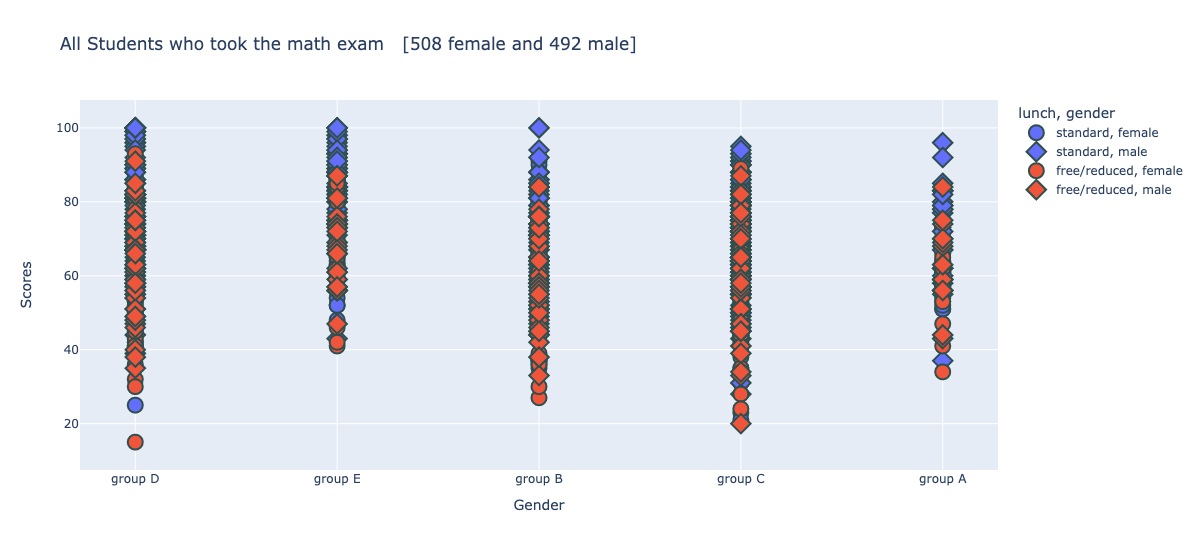

In [134]:
f_count = data['gender'].value_counts()[0]
m_count = data['gender'].value_counts()[1]

fig = px.scatter(data_frame = data, x ='race/ethnicity',y = 'math score',color = 'lunch',symbol = 'gender',
                 title='All Students who took the math exam   ['+str(f_count)+' female and '+str(m_count)+' male]')
fig.update_layout(xaxis_title="Gender",
                 yaxis_title="Scores",
                 autosize=False,
                 width=1200,
                 height=550)
fig.update_traces(marker=dict(size=15,line=dict(width=2,color='DarkSlateGrey')),
                 selector=dict(mode='markers'))
fig.show("png")

##### All Students
This graph shows us the spread of each ethnic group math scores. Group E has a smaller deviation than the rest, keep in mind it also has fewer students than most groups coming in at 143 students. The mean student count per ethnic group is 200. Group A has similar characteristics to group E but its range is slightly shifted 10 points lower. Groups B, C and D have the most population in this sample. If we look closely at these groups, one might say that race/ethnicity has little influence on scores since there is a large spread on their math scores. 


##### Group E
It seems like group E is the highest performing race/ethnicity. Amazingly it remains very balanced with 73 male students and 70 female students. When it comes to lunch, 97 students pay for standard meals and 46 have free or reduced lunch. Similarly 94 students did not take the preparation course, while 49 did take the course. Finally it would seem that most of group E parents have not received a college degree. 

In [116]:
data_group_E = data[data['race/ethnicity'] == 'group E']

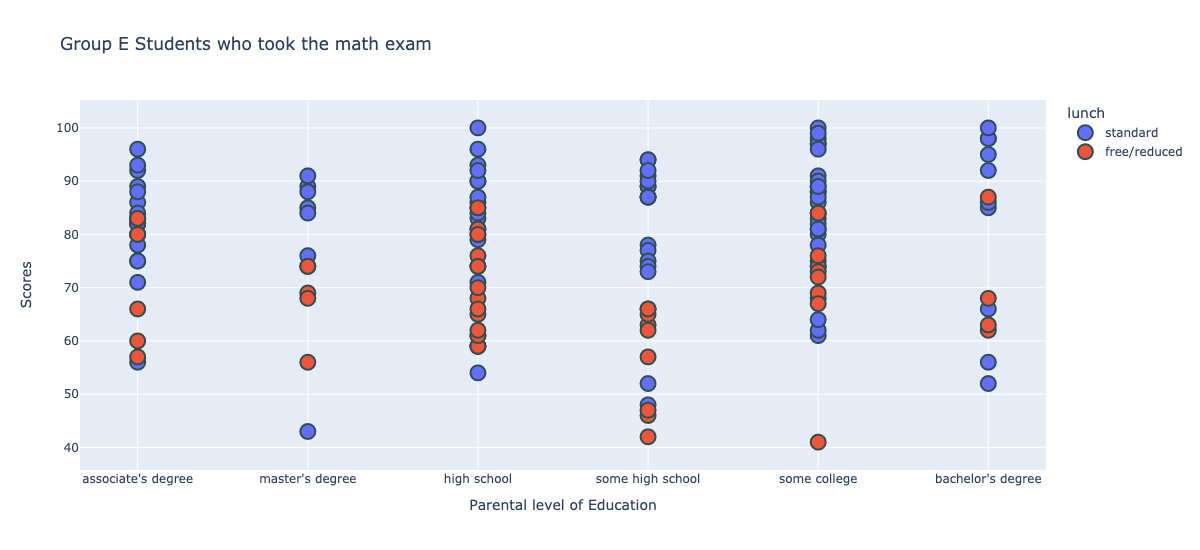

In [125]:
fig = px.scatter(data_frame = data_group_E, x ='parental level of education', y = 'math score',color = 'lunch',
                 title='Group E Students who took the math exam')
fig.update_layout(xaxis_title="Parental level of Education",
                 yaxis_title="Scores",
                 autosize=False,
                 width=1200,
                 height=550)
fig.update_traces(marker=dict(size=15,line=dict(width=2,color='DarkSlateGrey')),
                 selector=dict(mode='markers'))
fig.show("png")

The best performing students do not have reduced or free lunch. This means that their parents make enough money to not require free or reduced price meals. The reason for thier performance on their math exam is still not clear. Culturally group E students seem to pay more focus on their studies than the other groups. It could be related that most parents of group E did not get a college degree. 

#### Encode textual data in to numerical

In [138]:
data_not_categorical = pd.get_dummies(data_categorical,dtype=int)

new_data = pd.concat([data_not_categorical, data.select_dtypes('int64')],axis = 1)
new_data.sample(10)

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,math score,reading score,writing score
732,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,82,95,100
32,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,69,78,75
233,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,75,71,76
359,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,95,85,80
922,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,65,66,61
216,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,58,66,70
603,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,55,49,44
728,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,98,88,85
108,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,61,58,56
842,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,90,72,79


### Examine the correlation between Math Scores and the rest of the columns

Text(0.5, 1.0, 'Math Exam score Correlation')

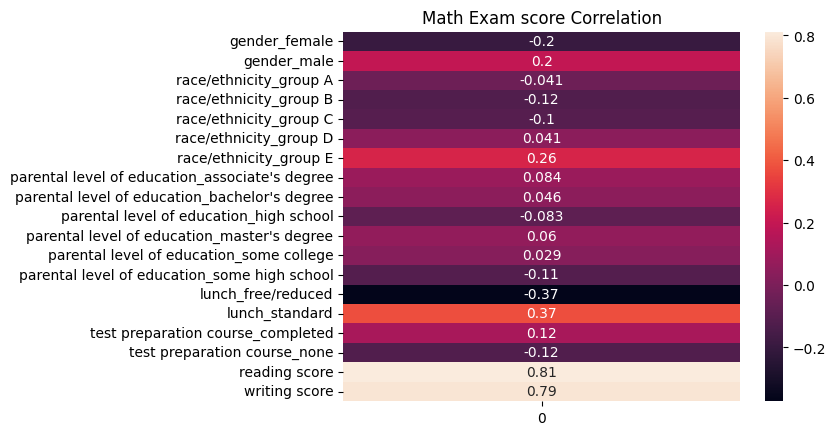

In [196]:
corr_with_target = new_data.drop(columns='math score').corrwith(new_data['math score'])
sns.heatmap(pd.DataFrame(corr_with_target), annot= True)
plt.title("Math Exam score Correlation")

##### My thoughts
According to the data students who scored well on thier reading and writing also did well on their math exam. Negative correlation means that the variables values move in opposite direction. For example, lets look at gender. According to the data, if we have more males. This will positively affect our math exams score. If we have more females, this will lower the math exam scores. This does not mean that males are superior than females. Ideally gender should not affect any exam score.

Looking at the racial data, group D and E positively influence the math scores. There may be cultural differences that make parents pay more attention to their childrens education.

According to the data, parents that persued college education positively correlates to thier children performing better in this math exam.

Students who do not have free or reduced lunch generally did better on the math exam. It is possible that these students had more resources available to them from their parents.

Finally the test preparation course had a some benefit. It would be best to have more students take this course.